# Solutions and visualizations

To visualize and analyse data I'll be using Python.

## 1. Preparing data

In [1]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Importing data from csv files to DataFrames

customer_orders = pd.read_csv('Datasets\customer_orders.csv')
customers_zip = pd.read_csv('Datasets\customers_zip.csv')
delivery_zip = pd.read_csv('Datasets\delivery_zip.csv') 
orders = pd.read_csv('Datasets\orders.csv')
sports = pd.read_csv('Datasets\sports.csv')

In [3]:
# Creating a simple function to make code more readable
def drop_unnamed(dataset):
    dataset.drop(dataset.columns[dataset.columns.str.contains('unnamed', case = False)], axis = 1, inplace = True)

# Dropping index column that was imported from csv files
drop_unnamed(customer_orders)
drop_unnamed(customers_zip)
drop_unnamed(delivery_zip)
drop_unnamed(sports)
drop_unnamed(orders)

## 2. What percentage of customers pick up their orders in a different zip code than they live in?

In [4]:
# Merging dataset that contains customer home zip code and dataset with data about delivery zip
customers_delivery_zip = customers_zip.merge(delivery_zip, how = 'outer', on = 'customer_id', )

# Setting conditions to compare rows whether they contain the same zip code
conditions = [customers_delivery_zip['zip_cust'] == customers_delivery_zip['zip_del'],
                customers_delivery_zip['zip_cust'] != customers_delivery_zip['zip_del']]

# List of boolean values for conditions
choices = ['True', 'False']

# Adding column to 'customers_delivery_zip' DataFrame that contains boolean values: True if row has the same zip code and False if row has different zip code
customers_delivery_zip['same_zip'] = np.select(conditions, choices, default = False)
print(customers_delivery_zip)

         customer_id  zip_cust  zip_del same_zip
0         77461851.0   39435.0  55685.0    False
1         37934116.0   92635.0  36236.0    False
2         39770481.0   61090.0      NaN    False
3         50298765.0   40516.0  78823.0    False
4         23383753.0   85367.0  75757.0    False
...              ...       ...      ...      ...
1704776   22997615.0   18863.0  18863.0     True
1704777   22997615.0   18863.0  22874.0    False
1704778   52840571.0   56465.0  56465.0     True
1704779   52840571.0   56465.0  56162.0    False
1704780          NaN       NaN      NaN    False

[1704781 rows x 4 columns]


In [5]:
# Counting number of rows that have a different zip code
number_of_different_zips = customers_delivery_zip.same_zip.value_counts()

# Calculating the percentage of rows containing different zip codes
different_zip_percentage = (number_of_different_zips['False'] / len(customers_delivery_zip['same_zip'])) * 100

# Calculating the percentage of rows containing the same zip codes
same_zip_percentage = (number_of_different_zips['True'] / len(customers_delivery_zip['same_zip'])) * 100

# Printing the percentage of rows ontaining different zip codes
print("Percentage of orders delivered to different zip code:", round(different_zip_percentage, ndigits = 2), "%")

Percentage of orders delivered to different zip code: 62.41 %


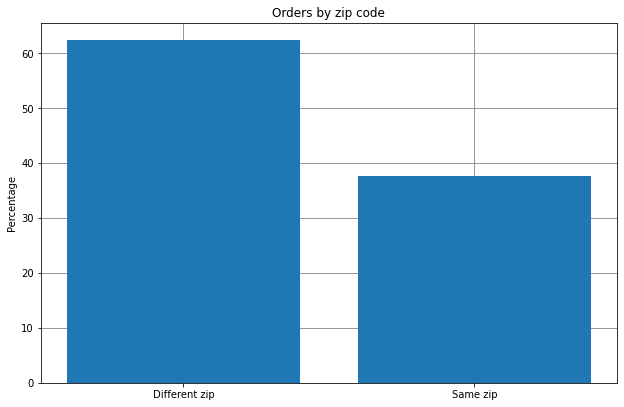

In [6]:
# Visualizing percentages on a bar graph
fig = plt.figure(figsize =(8, 5))

# Setting values
columns = ['Different zip', 'Same zip']
values = [different_zip_percentage, same_zip_percentage]

# Design of the graph
ax = fig.add_axes([0,0,1,1])
ax.bar(columns, values)
ax.set_axisbelow(True)
ax.grid(color='gray')

# Adding labels
plt.ylabel('Percentage')
plt.title('Orders by zip code')

plt.show()

## 3. Most and least popular sports

In [7]:
# Grouping 'sports' DataFrame by number of orders in each category and sorting in descending order
grouped_sports = sports.groupby('sport')['customer_id'].count().sort_values(ascending=False)
print(grouped_sports)

sport
p3ywanie       274855
3ucznictwo     222829
nurkowanie     211743
myolistwo      180655
jeYdziectwo     63640
bieganie        53111
rowery          43038
karate          21695
aquafitness     21566
judo            21476
snowboard       21472
chodzenie       21423
hokej           21409
myslistwo       10834
Name: customer_id, dtype: int64


In [8]:
# Printing the most and least popular sports
print("The most popular sport is", grouped_sports.index[0],"with", max(grouped_sports), "orders")
print("The least popular sport is", grouped_sports.index[-1],"with", min(grouped_sports), "orders")

The most popular sport is p3ywanie with 274855 orders
The least popular sport is myslistwo with 10834 orders


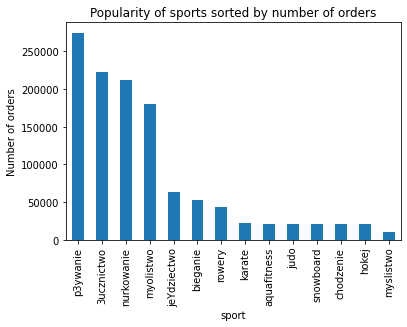

In [9]:
# Visualizing number of orders in each category on a graph
grouped_sports.plot(kind = 'bar')

# Adding labels
plt.title('Popularity of sports sorted by number of orders')
plt.ylabel('Number of orders')

plt.show()

As we can see the most popular category is `"pływanie"` and the least popular is `"myślistwo"`. It only shows the actual data but to get deeper understanding of why it is like that we would have to check for more specific informations such as: average and median order value, total order value (I suppose that certain categories are more expensive than others) or a number of items and their cost needed for a certain sport. Those are just some ideas for comparing those two categories that might be a subject for a much deeper analysis.

## 4. Number of customers doing more than 2 sports

In [10]:
# Creating empty DataFrame
grouped_by_customers = pd.DataFrame()

# Grouping "sports" DataFrame on customer_id and counting number of categories they ordered from
grouped_by_customers['number_of_sports'] = sports.groupby('customer_id')['sport'].count()

# Sorting for rows containing customers that ordered from more than 2 categories
customers_more_than_2_sports = len(grouped_by_customers[grouped_by_customers['number_of_sports'] > 2])

# Printing results
print("Number of customers ordering from more than 2 categories:", customers_more_than_2_sports)
print("Percentage of customers ordering from more than 2 categories:", round((customers_more_than_2_sports / len(grouped_by_customers)) * 100, 2), "%")

Number of customers ordering from more than 2 categories: 5040
Percentage of customers ordering from more than 2 categories: 0.48 %


## 5. Average order value

In [11]:
# Calculating average order value
mean_order_value = orders['value'].mean()

# Calculating median order value
median_order_value = orders['value'].median()

# Printing results
print("Average order value is:" , round(mean_order_value, 2))
print("Median order value is equal to:", median_order_value)

Average order value is: 25396.01
Median order value is equal to: 405.0


Average order value is **`25396.01`** but to get a bigger picture of the data we need to look also at the median value which is equal to **`405`**. As we can see average value is much higher which suggests that there are some outliers - orders much bigger than the rest.

## 6. Average order value of customers ordering from category "jeździectwo"

In [12]:
# Merging 'customer_orders', 'orders' and 'sports' datasets into one DataFrame
customer_orders_value = customer_orders.merge(orders, on = 'order_id')
customer_orders_value_sports = customer_orders_value.merge(sports, on = 'customer_id')

# Selecting only rows that contain data about category "jeździectwo"
customer_orders_jezdziectwo = customer_orders_value_sports.loc[customer_orders_value_sports['sport'] == 'jeYdziectwo']
print(customer_orders_jezdziectwo)

         customer_id    order_id   value        sport
31         5775704.0  62291544.0  759.98  jeYdziectwo
35        59147471.0  58231221.0  685.78  jeYdziectwo
40        32683424.0  26934331.0   46.16  jeYdziectwo
56         3206085.0  71869961.0  771.86  jeYdziectwo
146       44476885.0  35020342.0  233.66  jeYdziectwo
...              ...         ...     ...          ...
4917247   81723809.0  23151667.0  594.17  jeYdziectwo
4917248   81723809.0  23808176.0  650.55  jeYdziectwo
4917339   39250750.0  38057329.0   50.62  jeYdziectwo
4917340   39250750.0  35460508.0  648.91  jeYdziectwo
4917341   39250750.0  10957224.0   67.77  jeYdziectwo

[240522 rows x 4 columns]


In [13]:
# Calculating average and median value order value
mean_order_value_jezdziectwo = customer_orders_jezdziectwo['value'].mean()
median_order_value_jezdziectwo = customer_orders_jezdziectwo['value'].median()

# Printing results
print("Average order value in category 'jeździectwo' is equal to:", round(mean_order_value_jezdziectwo, 2))
print("Median order value in category 'jeździectwo' is equal to:", median_order_value_jezdziectwo)

Average order value in category 'jeździectwo' is equal to: 26017.4
Median order value in category 'jeździectwo' is equal to: 406.89


Average order value in category `"jeździectwo"` is equal to **`26017.4`**, but again to get a bigger picture we need to look at median order value which is equal to **`406.89`**. That shows us that there are some big orders that are much bigger than median order.

## 7. Summary

**Question No. 1**
- Percentage of orders delivered to different zip code: **`62.41%`** 

**Question No. 2**
- The most popular category is **`"pływanie"`** with **`274855`** orders
- The least popular category is **`"myślistwo"`** with **`10834`** orders

**Question No. 3**
- Number of customers ordering from more than 2 categories: **`5040`** which is **`0.48%`** of total orders

**Question No. 4**
- Average order value is: **`25396.01`**
- Median order value is equal to: **`405.0`**

**Question No. 5**
- Average order value in category **`"jeździectwo"`** is equal to: **`26017.4`**
- Median order value in category **`"jeździectwo"`** is equal to: **`406.89`**